<a href="https://colab.research.google.com/github/Vivek-afk81/data_mining/blob/main/HandwrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:

# Change to a specific directory
os.chdir('/content/drive/My Drive/data_mining')

# Verify current directory
print(os.getcwd())

/content/drive/My Drive/data_mining


In [ ]:
!ls

handwrittendigits  HandwrittenDigits.ipynb


## Load and Prepare Data

For all three demonstrations of dimensionality reduction, we'll use the "Optical Recognition of Handwritten Digits Data Set," which can be accessed via
https://j.mp/34NFNGn. We'll use the dataset saved in "optdigits.tra," which is the training dataset.

In [ ]:
df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra',
header=None)

check the data

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


###Renaming the variables



*   Sequentially renames all attribute columns(i.e. pixel data) as P0,P2...
*   Renames tle classs variables as y



In [ ]:
df.columns=["P"+str(i) for i in range(0,len(df.columns)-1)]+["y"]

In [ ]:
# checking the data
df.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


###Select Cases



1.   select cases for the digits{1,2,3}




In [ ]:
df=df.loc[df.y.isin([1,3,6])]
df.head()
## these are the ones that hve y as 6,3,1

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
11,0,0,0,3,16,11,1,0,0,0,...,0,0,0,0,2,14,14,1,0,1
14,0,0,7,11,11,6,0,0,0,9,...,0,0,0,14,16,12,10,1,0,3
24,0,0,9,13,1,0,0,0,0,0,...,5,0,0,4,15,16,16,16,16,1
27,0,0,0,10,12,0,0,0,0,0,...,0,0,0,1,11,14,12,1,0,6


###Split the Data
* use train_test split
*  Specify the data matrix x , which contrains the attributes of the pixel data.
* Extract columns PO, P2, ... , P63 with df.filter (regex='\d' ) , which will keep only names with a numeric digits in them.
* Specify the target variable as df. y.
*  Create the trn and tst dataframes.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    df.filter(regex=r'\d'),
    df.y,
    test_size=.30,
    random_state=1
)

trn=X_train
trn['y']=y_train

#Creates the testting dataset,tst

tst=X_test
tst["y"]=y_test

##Explore Training data

###Display the images
Display the images of the first 20 digits of X_train

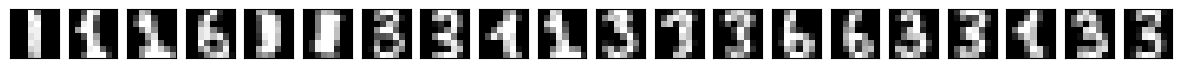

In [ ]:
# Setting the grid for the images

fig,ax=plt.subplots(
    nrows=1,
    ncols=20,
    figsize=(15,3.5),
    subplot_kw=dict(xticks=[],yticks=[])
)

#plot 20 digits

for i in np.arange(20):
  ax[i].imshow(X_train.to_numpy()[i,0:-1].reshape(8,8),cmap=plt.cm.gray)

###Explore Attribute Variables

Selectss four arbitrary features (any four will do) and get paired plots

Why histograms?
1. Shows distribution shape
2. Shows class overlap
3. Detects skewness or multimodality

Interpretation:
* If colors overlap heavily → poor separation
* If peaks differ by class → strong feature

🔹 Upper triangle — smooth density relationships

Plots kernel density estimates (KDEs) for feature pairs above the diagonal.

Why KDE plots?

1. Smoothed version of scatter
2. Shows density concentration
3. Highlights clusters and overlap


Interpretation:
* Separate blobs → good discriminative power
* Heavy overlap → harder classification

🔹 Lower triangle — raw relationships

Plots scatter plots for feature pairs below the diagonal.

Why scatter plots?

Shows actual data points

Reveals:
* Linear vs nonlinear relationships
* Outliers
* Noise patterns

 Interpretation:

* Clear class boundaries → easier modeling
* Curves → nonlinear models needed

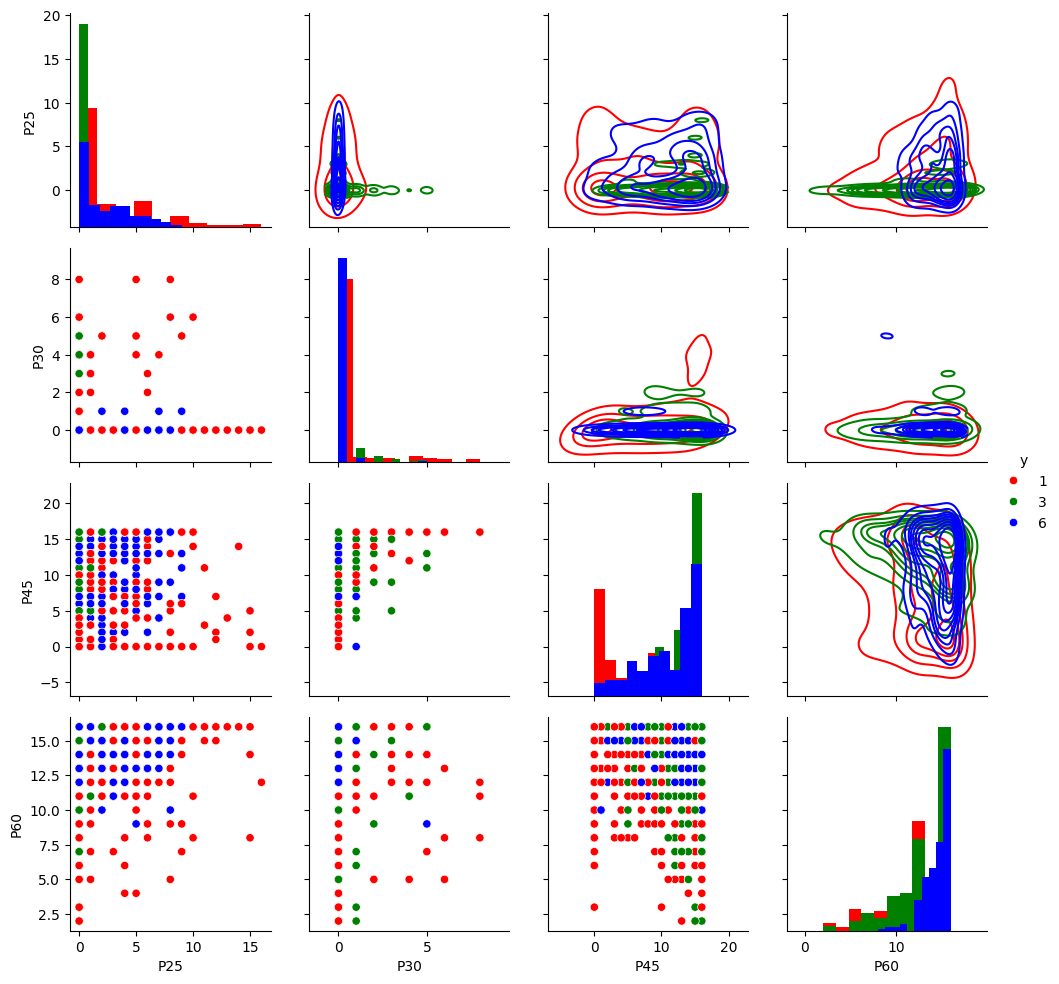

In [ ]:
# Creates a grid using Seaborn as PairGrid()
g=sns.PairGrid(
    trn,
    vars=["P25","P30","P45","P60"], #random variables
    hue="y",
    diag_sharey=False,
    palette=["red","green","blue"]
)

#Adds histograms on the diagonal
g.map_diag(plt.hist)

#Adds density plots above the diagonal
g.map_upper(sns.kdeplot)

#Add scatter plots below the diagonal
g.map_lower(sns.scatterplot)

#Add a legend

g.add_legend()

| Observation              | Modeling Implication       |
| ------------------------ | -------------------------- |
| Strong linear separation | Logistic regression / LDA  |
| Curved boundaries        | Trees, SVM (RBF), NN       |
| Heavy overlap            | Feature engineering needed |
| Different scales         | Standardization            |
| Outliers                 | Robust models              |


In [ ]:
#Save the data

# df.to_csv('./data/optdigits.csv', sep=',', index=False)
# trn.to_csv('./data/optdigits_trn.csv', sep=',' ,index=False)
# tst.to_csv('./data/optdigits_tst.csv', sep=',' ,index=False)